In [1]:
import numpy
import matplotlib.pyplot as pyplot
from geom2D import Elem, CreateFlashH5

In [2]:
npoints = 300
theta = numpy.linspace(0, 2*numpy.pi, npoints)
xcircle = 0.5*numpy.cos(theta)
ycircle = 0.5*numpy.sin(theta)

elems = []

for i in range(npoints-1):
    elems.append(Elem([xcircle[i+1], ycircle[i+1]], 
                      [xcircle[i], ycircle[i]]))

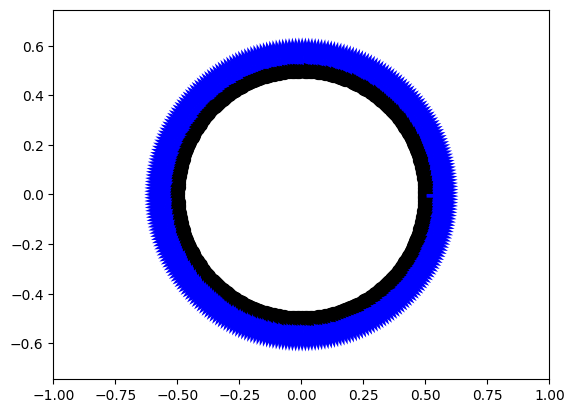

In [3]:
pyplot.figure()
for elem in elems:
    elem.rotate(0)
    pyplot.plot([elem.pA[0], elem.pB[0]],[elem.pA[1], elem.pB[1]],'k')
    pyplot.scatter(elem.center[0], elem.center[1], color='k', marker='o', s=100)
    pyplot.quiver(elem.center[0], elem.center[1], elem.normal[0], elem.normal[1], scale=15, color='b')
    #pyplot.quiver(elem.center[0], elem.center[1], elem.tangent[0], elem.tangent[1], scale=15, color='orange')
    pyplot.axis('equal')
    pyplot.xlim([-1, 1])
    pyplot.ylim([-1, 1])

(0.4998840873896766,
 0.5000055196481107,
 -0.0005253112782118854,
 0.011031536842449592)

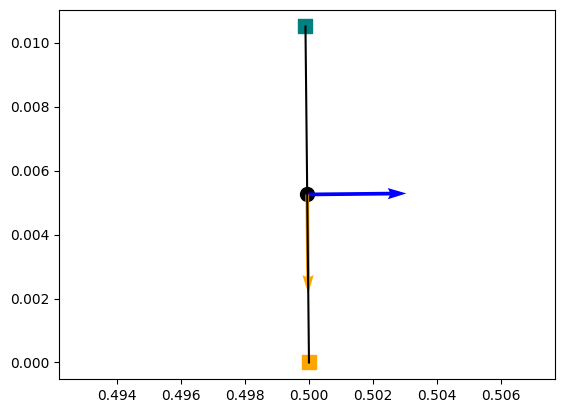

In [4]:
elem = elems[0]
pyplot.figure()
pyplot.scatter(elem.pA[0],elem.pA[1], color='teal', marker='s', s=100)
pyplot.scatter(elem.pB[0],elem.pB[1], color='orange', marker='s', s=100)
pyplot.plot([elem.pA[0], elem.pB[0]],[elem.pA[1], elem.pB[1]],'k')
pyplot.scatter(elem.center[0], elem.center[1], color='k', marker='o', s=100)
pyplot.quiver(elem.center[0], elem.center[1], elem.normal[0], elem.normal[1], scale=5, color='b')
pyplot.quiver(elem.center[0], elem.center[1], elem.tangent[0], elem.tangent[1], scale=5, color='orange')
pyplot.axis('equal')

In [5]:
dot = elem.normal[0]*-elem.normal[0] + elem.normal[1]*-elem.normal[1]
mag = numpy.sqrt(elem.normal[0]**2+elem.normal[1]**2)*numpy.sqrt((-elem.normal[0])**2+(-elem.normal[1])**2)

In [6]:
numpy.arccos(dot/(mag+1e-13))

3.1415922065549573

In [7]:
dot = elem.normal[0]*elem.tangent[0] + elem.normal[1]*elem.tangent[1]
mag = numpy.sqrt(elem.normal[0]**2+elem.normal[1]**2)*numpy.sqrt(elem.tangent[0]**2+elem.tangent[1]**2)

In [8]:
numpy.arccos(dot/(mag+1e-13))

1.5707963267948966

In [9]:
CreateFlashH5("../../simulation/ImBound/Example2D/circle_hdf5_ibd_0001", elems)